<h1 align='center'> Random variables </h1>

<h2> Introduction </h2>

So far we have already inspection the concepts of variables, functions and probability. In this notebook we will combine the three in the concept of random variable.

Given a sample space $\Omega$, a random variable is a function that assigns to each event a real value. For example, in the dice example of the previous notebook, let $x$ be the outcome of the first dice and $y$ the outcome of the second, then the random variable of the sum of both values is given by:

$$f(x, y) = x + y$$

Thus,

$$f(1,1) = 2$$
$$f(4, 3) = 7$$

Now., let's write a program to output a table with all the possible results of the random variable $f(x, y)$:

In [1]:
import numpy as np


Ω = np.zeros((36,2))
k = 0
for i in range(1,7):
    for j in range(1,7):
        Ω[k,] = (i,j)
        k+=1

        
# calcula la variable aleatoria f: f(x,y)=x+y        
f = np.zeros(36)
for k in range(36):
    f[k] = Ω[k,0] + Ω[k,1]

    
# presenta los resultados
for k in range(36):
    print('f(',Ω[k,0],',',Ω[k,1],') =', f[k])

f( 1.0 , 1.0 ) = 2.0
f( 1.0 , 2.0 ) = 3.0
f( 1.0 , 3.0 ) = 4.0
f( 1.0 , 4.0 ) = 5.0
f( 1.0 , 5.0 ) = 6.0
f( 1.0 , 6.0 ) = 7.0
f( 2.0 , 1.0 ) = 3.0
f( 2.0 , 2.0 ) = 4.0
f( 2.0 , 3.0 ) = 5.0
f( 2.0 , 4.0 ) = 6.0
f( 2.0 , 5.0 ) = 7.0
f( 2.0 , 6.0 ) = 8.0
f( 3.0 , 1.0 ) = 4.0
f( 3.0 , 2.0 ) = 5.0
f( 3.0 , 3.0 ) = 6.0
f( 3.0 , 4.0 ) = 7.0
f( 3.0 , 5.0 ) = 8.0
f( 3.0 , 6.0 ) = 9.0
f( 4.0 , 1.0 ) = 5.0
f( 4.0 , 2.0 ) = 6.0
f( 4.0 , 3.0 ) = 7.0
f( 4.0 , 4.0 ) = 8.0
f( 4.0 , 5.0 ) = 9.0
f( 4.0 , 6.0 ) = 10.0
f( 5.0 , 1.0 ) = 6.0
f( 5.0 , 2.0 ) = 7.0
f( 5.0 , 3.0 ) = 8.0
f( 5.0 , 4.0 ) = 9.0
f( 5.0 , 5.0 ) = 10.0
f( 5.0 , 6.0 ) = 11.0
f( 6.0 , 1.0 ) = 7.0
f( 6.0 , 2.0 ) = 8.0
f( 6.0 , 3.0 ) = 9.0
f( 6.0 , 4.0 ) = 10.0
f( 6.0 , 5.0 ) = 11.0
f( 6.0 , 6.0 ) = 12.0


<h2> Probability of a random variable </h2>

To find the probability of a random variable we first need to compute the frequency table of possible outcomes, and then calculate the proportion of this variable happening. In the previous example:

In [7]:
vals_dict = {}

for i, j in enumerate(Ω):
    function = 'f(' + str(j[0]) + ', ' + str(j[1])
    vals_dict[function] = f[i]

In [14]:
import pandas as pd

freq = pd.DataFrame.from_dict(vals_dict, orient='index')
freq.columns = ['Value']
freq['Frequency'] = 1
freq = freq.groupby('Value').sum()
freq

,Frequency
Value,
2.0,1
3.0,2
4.0,3
5.0,4
6.0,5
7.0,6
8.0,5
9.0,4
10.0,3


Here we see how many times each of the values in the function appears, so if we want to find the probability of each one of these happening we need to find the relative frequency by just dividing the absolute frequencies above to the sum of observations like:

In [37]:
total = np.sum(freq['Frequency'])
rel_freq = freq.copy()
rel_freq['Rel. Frequency'] = rel_freq['Frequency']/total
rel_freq

,Frequency,Rel. Frequency
Value,,
2.0,1,0.027778
3.0,2,0.055556
4.0,3,0.083333
5.0,4,0.111111
6.0,5,0.138889
7.0,6,0.166667
8.0,5,0.138889
9.0,4,0.111111
10.0,3,0.083333


Note that by construction the sum of probabilities is 1:

In [38]:
np.sum(rel_freq['Rel. Frequency'])

1.0

In [54]:
total

36

The relative frequency table is in fact a probability table that gives us the probability for each outcome of the random variable, so, for instance, $P(f = 10) = 0.083$. In most cases is a good idea to plot the probability distribution, so let's do that using `matplotlib`:

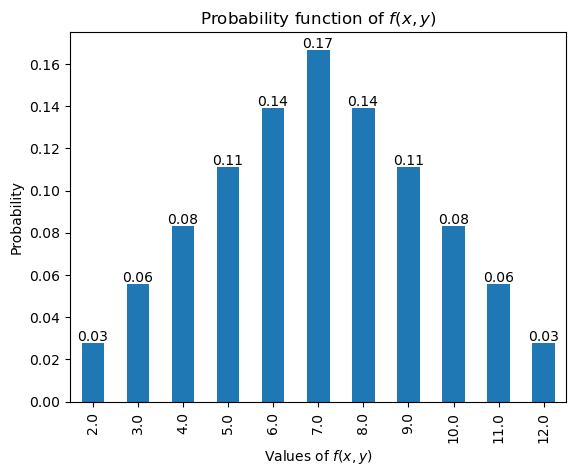

In [53]:
import matplotlib.pyplot as plt

ax = rel_freq.drop('Frequency', axis=1).plot(kind='bar', legend=False)
plt.xlabel('Values of $f(x, y)$')
plt.ylabel('Probability')
plt.title('Probability function of $f(x,y)$')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() - 0.1, p.get_height() + 0.001))

With the previous distribution, we can find some probabilities by using the rules studied in the previous notebook:

$$p(f > 10) = \frac{3}{36}$$
$$p(f \text{ being an even number}) = \frac{18}{36}$$
$$p(f \leq 6) = \frac{12}{36}$$

Check this results.

<h2> Discrete random variables </h2>

We say that a random varible is discrete if it has a countable number of outcomes, like in our dice example in which identified 11 possible outcomes. Now we will see some important discrete probability distributions.

<h3> Bernoulli distribution </h2>

A random variable $f$ is a Bernoulli type of distribution if it can only takes two values, that for convention we set them as $\{0,1\}$. We denote the probability of $f=1$ to be $p(f=1) = \pi$, thus we can e write the probaility function o $f$ as:

$$p(f) = \pi^x (1 - \pi)^{(1-x)}, x=0,1 $$

A simple example of this is tossing a coin, which can only have two outcomes, namely heads or tails. Another example in our dice case could be setting the success event as getting two dices which sum is an even number; in which case $\pi = 18/36$. 

<h3> Binomial distribution </h3>

Consider a random variable that follows a Bernoulli process, for example tossing a coin. If we do this experiment with a fair coin, then $\pi = 0.5$ and the sample space is $\Omega = \{H, T\}$ ($H=\text{heads}$ and $T=\text{tails}$). Now suppose we do this experiment a $n=3$ times, then the sample space increase to:

$$\Omega=\{(H,H,H), (H,H,T), (H,T,H), (T, H,H), (H,T,T), (T,H,T), (T,T,H), (T,T,T)\}$$

If we want to calculate the probability of getting two tails, we will have to apply the following formula:

$$P(x) = \binom{n}{x} \pi^x (1-\pi)^{(n - x)}$$

where

- $n:$ number of experiments
- $x:$ number of successes
- $\pi:$ probability of getting a success

and

$$\binom{n}{x} = \frac{n!}{x!(n - x)!}$$
In the coin example, 

$$P(T=2) = \binom{3}{2} (0.5 ^2) (0.5) = 0.375$$

To fully understand the binomial distribution formula, we just need to apply the multiplication property of probabilities for independen events. Note that the event of getting a heads in on toss is independent to getting a tails in the next. Thus, to find the probability of getting two tails in three tossess, we just need to multiply $\pi = 0.5$ the number of times we can possible see two tosses to appear (which is $\binom{3}{2}$).

<h3> Poisson distribution </h3>

The Poisson distribution is commonly used in problems in which counting is essential, for example finding the probability of seeing three red cars in a given intersection withing 5 minutes. And a random variable that follows a Poisson distribution can only takes integers between $0$ and $\infty $, and it is computed using the following formula:

$$P(x) = \frac{e^{k} \lambda ^k}{k!}, x=0,1,2,...$$

where $\lambda > 0$ is the mean number of the variable $x$ to appear in a given unit (time, space, volume, etc).

<h2> Mathematical expectation of a discrete random variable </h2>

We define the mathematical expectation (or, simply the expectation) of a random variable as the weighted mean of all it's possible outcomes. So for a random variable with possible values $\mathbf{x} = (x_{1}, x_{2}, ... , x_{n})$ and a it's respective vector of probabilities $\mathbf{p} = (p_{1}, p_{2}, ..., p_{n})$ (where $p_{i}$ is the probability of $x_{i}$, for all $i = 1, 2, ..., n$), we compute the expectation of $\mathbf{x}$ as:

$$E[x] = \mathbf{p} \cdot \mathbf{x} = p_{1}x_{1} + p_{2}x_{2} + ... + p_{n}x_{n}$$

So, for instance in the example of the sum of the outcomes of the dices, we will have

In [60]:
p = np.array(rel_freq['Rel. Frequency'])
x = rel_freq.index

np.dot(p, x)

6.999999999999999

<h2> Variance and standard deviation of a discrete random variable </h2>

In the same way we an compute the expectation of a random variable, we can also find the variance:

$$V[\mathbf{x}] = E[(\bar{x} - x)^2] = \sum_{i=1}^{n} p_{i}(x_{i} - \bar{x})^2$$

and it's standard deviation:

$$\sigma_{x} = \sqrt{V[x]}$$